# Machine learning to DJIA and predict stock price

In [100]:
# Set it up again
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import sklearn
from afinn import Afinn
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
%matplotlib inline

In [101]:
reddit_news_df = pd.read_csv("Combined_News_DJIA.csv")
# reddit_news_df.head()

Previously in phase 2 we found out only 3 rows contain null values, so I'm dropping those again.

In [102]:
reddit_news_df = reddit_news_df.dropna()

## Are sentiment analysis values of the more popular headlines/articles in the r/worldnews subreddit, better stock market predictors than less popular articles?

My assumptions would be that the top headlines would be the best predictors because they would be the ones getting the majority of public's attention and thus investors might take those headlines into consideration when they trade.

In the following cells I'll train logistic regression models using sentiment analysis of different Top# articles to predict whether the Dow Jones Industrial Average(DJIA) goes up or down.

Initializing sentiment analysis values:

In [103]:
af = Afinn()

top1_headlines = reddit_news_df['Top1']
top1_headlines = [headline.replace('b"', '').replace('b\'', "'") for headline in top1_headlines]
top1_sentiment_scores = [af.score(headline) for headline in top1_headlines]

reddit_news_df['Top1 Sentiment'] = top1_sentiment_scores

top5_headlines = reddit_news_df['Top5']
top5_headlines = [headline.replace('b"', '').replace('b\'', "'") for headline in top5_headlines]
top5_sentiment_scores = [af.score(headline) for headline in top5_headlines]

reddit_news_df['Top5 Sentiment'] = top5_sentiment_scores

top15_headlines = reddit_news_df['Top15']
top15_headlines = [headline.replace('b"', '').replace('b\'', "'") for headline in top15_headlines]
top15_sentiment_scores = [af.score(headline) for headline in top15_headlines]

reddit_news_df['Top15 Sentiment'] = top15_sentiment_scores

top25_headlines = reddit_news_df['Top25']
top25_headlines = [headline.replace('b"', '').replace('b\'', "'") for headline in top25_headlines]
top25_sentiment_scores = [af.score(headline) for headline in top25_headlines]

reddit_news_df['Top25 Sentiment'] = top25_sentiment_scores

In [104]:
reddit_train = reddit_news_df.loc[:944].copy()
reddit_test = reddit_news_df.loc[944:].copy()

### Comparing models using Top1, Top5, Top15, Top25 headlines sentiment analysis values

In [105]:
x_train = reddit_train[['Top1 Sentiment']]
x_test = reddit_test[['Top1 Sentiment']]
y_train = reddit_train[['Label']]
y_test = reddit_test[['Label']]

logReg = LogisticRegression()
logReg.fit(x_train, y_train.values.ravel())
y_pred = logReg.predict(x_test)
print('Accuracy of Top1 test set: {:.2f}'.format(logReg.score(x_test, y_test)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Top1 model true negatives:', tn)
print('Top1 model true positives:', fp)
print('Top1 model false negatives:', fn)
print('Top1 model false positives:', tp, '\n')

################################# TOP 5 ####################################

x_train = reddit_train[['Top5 Sentiment']]
x_test = reddit_test[['Top5 Sentiment']]
y_train = reddit_train[['Label']]
y_test = reddit_test[['Label']]

logReg = LogisticRegression()
logReg.fit(x_train, y_train.values.ravel())
y_pred = logReg.predict(x_test)
print('Accuracy of Top5 test set: {:.2f}'.format(logReg.score(x_test, y_test)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Top5 model true negatives:', tn)
print('Top5 model true positives:', fp)
print('Top5 model false negatives:', fn)
print('Top5 model false positives:', tp, '\n')


################################# TOP 15 ####################################

x_train = reddit_train[['Top15 Sentiment']]
x_test = reddit_test[['Top15 Sentiment']]
y_train = reddit_train[['Label']]
y_test = reddit_test[['Label']]

logReg = LogisticRegression()
logReg.fit(x_train, y_train.values.ravel())
y_pred = logReg.predict(x_test)
print('Accuracy of Top15 test set: {:.2f}'.format(logReg.score(x_test, y_test)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Top15 model true negatives:', tn)
print('Top15 model true positives:', fp)
print('Top15 model false negatives:', fn)
print('Top15 model false positives:', tp, '\n')

################################# TOP 25 ####################################

x_train = reddit_train[['Top25 Sentiment']]
x_test = reddit_test[['Top25 Sentiment']]
y_train = reddit_train[['Label']]
y_test = reddit_test[['Label']]

logReg = LogisticRegression()
logReg.fit(x_train, y_train.values.ravel())
y_pred = logReg.predict(x_test)
print('Accuracy of Top25 test set: {:.2f}'.format(logReg.score(x_test, y_test)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Top25 model true negatives:', tn)
print('Top25 model true positives:', fp)
print('Top25 model false negatives:', fn)
print('Top25 model false positives:', tp, '\n')

Accuracy of Top1 test set: 0.53
Top1 model true negatives: 3
Top1 model true positives: 488
Top1 model false negatives: 3
Top1 model false positives: 551 

Accuracy of Top5 test set: 0.53
Top5 model true negatives: 0
Top5 model true positives: 491
Top5 model false negatives: 0
Top5 model false positives: 554 

Accuracy of Top15 test set: 0.52
Top15 model true negatives: 19
Top15 model true positives: 472
Top15 model false negatives: 29
Top15 model false positives: 525 

Accuracy of Top25 test set: 0.53
Top25 model true negatives: 0
Top25 model true positives: 491
Top25 model false negatives: 0
Top25 model false positives: 554 



#### Observations
So it appears that models that use the sentiment analysis values of articles of different popularity have roughly the same accuracy of predicting the DJIA. One other observation is that sentiment analysis doesn't appear to be a good feature at first glance. All models had an accuracy of 52-53%. Though maybe this is actually good for a single feature. As we know, predicting the stock market is hard and other features need to be considered before disregarding sentiment analysis. 

One thing to note is the large amount of true positives the models predict. So it seems the models tend to be better at predicting when the DJIA is going to up or stay the same than predicting when its going to go down.

## Is there a better feature than sentiment analysis to predict the DJIA?

In this section I will use moving average of the DJIA as a feature to train a new model.

Moving average is the mean value of the DJIA over certain time periods. For example a 100-day moving average would be the mean value of the DJIA close value over the past 100 days. It's widely used by investors to aid in choosing to sell or hold a stock market position, if the moving average is rising then it is assumed that the stock is on an uptrend and has a good chance of increasing in price.

In [106]:
# reset df 
reddit_news_df = pd.read_csv("Combined_News_DJIA.csv")
reddit_news_df = reddit_news_df.dropna()

# CSV with the DJIA data
djia_df = pd.read_csv("upload_DJIA_table.csv")

# Get rows with that having matching dates.
merged_df = pd.merge(djia_df, reddit_news_df, on=['Date'], how='inner')
merged_df = merged_df.dropna()

### Comparing models with 5-day moving average, 10-day moving average, 25-day moving average, 50-day moving average and 100-day moving average  

In [107]:
# Find moving averages
merged_df["ma-5"] = merged_df['Close'].rolling(window=5).mean()
merged_df["ma-10"] = merged_df['Close'].rolling(window=10).mean()
merged_df["ma-25"] = merged_df['Close'].rolling(window=25).mean()
merged_df["ma-50"] = merged_df['Close'].rolling(window=50).mean()
merged_df["ma-100"] = merged_df['Close'].rolling(window=100).mean()

merged_df = merged_df.dropna()

ma_train = merged_df.loc[:1300].copy()
ma_test = merged_df.loc[1300:].copy()

merged_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top21,Top22,Top23,Top24,Top25,ma-5,ma-10,ma-25,ma-50,ma-100
99,2016-02-10,16035.610352,16201.889648,15899.910156,15914.740234,122290000,15914.740234,0,British ISIS fighter who called himself 'Super...,Animals reduced to cannibalism in Egyptian zoo...,...,Turkey's Leader Blames U.S. for 'Sea of Blood'...,N. Korea starts to feel neighbors' wrath over ...,"Pope Francis despatches 1,000 'super-confessor...",North Korea Expels South Koreans From Joint Pa...,UK Junior doctors' contract set to be imposed,16039.800000,16254.184961,16686.557969,17203.143437,17478.696152
100,2016-02-09,16005.410156,16136.620117,15881.110352,16014.379883,127740000,16014.379883,0,"Australia introduces ""Netflix tax"" legislation...",Disbelief as Egyptian president rolls out four...,...,Several large nations consider levies on sweet...,North Korean satellite 'stable' in orbit after...,"Top Intel Official Confirms ISIS Made, Used Ch...",Israeli Parliament Suspends Arab MPs Who Met A...,Stock market rout intensifies amid fears centr...,15951.909961,16207.123926,16634.102773,17163.780645,17459.346260
101,2016-02-08,16147.509766,16147.509766,15803.549805,16027.049805,165880000,16027.049805,0,"North Korea satellite 'tumbling in orbit,' U.S...",North Korea has restarted plutonium reactor an...,...,Zurich police used tear gas and rubber bullets...,Global oil surplus will be bigger than thought...,Ex-JPMorgan Executive Fined $1.1 Million Over ...,Indian Soldier pulled out alive after being bu...,Ministers wined and dined by arms trade hours ...,15918.037891,16166.650977,16585.123594,17122.396250,17440.316855
102,2016-02-05,16417.949219,16423.630859,16129.809570,16204.969727,139010000,16204.969727,0,Denmarks justice minister admitted on Friday t...,UN Demands Zika-Infected Countries Give Women ...,...,"Syria warns Saudis against incursion, says wil...",The Pentagon on Friday released 198 photograph...,NATO: Soldiers lives can be saved by renewable...,Taiwan Warned of Fishery Collapse Number of s...,Brazil Health Researchers Say Zika Virus Is Ac...,15964.263867,16125.081934,16544.157148,17085.423652,17425.419756
103,2016-02-04,16329.669922,16485.839844,16266.160156,16416.580078,131490000,16416.580078,1,France has become the first country in the wor...,Man Ejected From Somali Plane in Midair Was Su...,...,Ecuador says it should be compensated for hous...,Chinese police have confirmed for the first ti...,"North Korea drops propaganda leaflets, trash, ...",China saw a 60 percent annual increase in its ...,"Italian Police Seize 85,000 Tons of Olives Cov...",16115.543945,16127.540918,16512.287930,17053.672051,17415.488350


In [108]:
x_train = ma_train[['ma-5']]
x_test = ma_test[['ma-5']]
y_train = ma_train[['Label']]
y_test = ma_test[['Label']]

logReg = LogisticRegression()
logReg.fit(x_train, y_train.values.ravel())
y_pred = logReg.predict(x_test)
print('Accuracy of 5-day moving average test set: {:.2f}'.format(logReg.score(x_test, y_test)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('5-day moving average model true negatives:', tn)
print('5-day moving average model true positives:', fp)
print('5-day moving average model false negatives:', fn)
print('5-day moving average model false positives:', tp, '\n')

############################ 10-day model ####################################

x_train = ma_train[['ma-10']]
x_test = ma_test[['ma-10']]
y_train = ma_train[['Label']]
y_test = ma_test[['Label']]

logReg = LogisticRegression()
logReg.fit(x_train, y_train.values.ravel())
y_pred = logReg.predict(x_test)
print('Accuracy of 10-day moving average test set: {:.2f}'.format(logReg.score(x_test, y_test)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('10-day moving average model true negatives:', tn)
print('10-day moving average model true positives:', fp)
print('10-day moving average model false negatives:', fn)
print('10-day moving average model false positives:', tp, '\n')

############################ 25-day model ####################################

x_train = ma_train[['ma-25']]
x_test = ma_test[['ma-25']]
y_train = ma_train[['Label']]
y_test = ma_test[['Label']]

logReg = LogisticRegression()
logReg.fit(x_train, y_train.values.ravel())
y_pred = logReg.predict(x_test)
print('Accuracy of 25-day moving average test set: {:.2f}'.format(logReg.score(x_test, y_test)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('25-day moving average model true negatives:', tn)
print('25-day moving average model true positives:', fp)
print('25-day moving average model false negatives:', fn)
print('25-day moving average model false positives:', tp, '\n')

############################ 50-day model ####################################

x_train = ma_train[['ma-50']]
x_test = ma_test[['ma-50']]
y_train = ma_train[['Label']]
y_test = ma_test[['Label']]

logReg = LogisticRegression()
logReg.fit(x_train, y_train.values.ravel())
y_pred = logReg.predict(x_test)
print('Accuracy of 50-day moving average test set: {:.2f}'.format(logReg.score(x_test, y_test)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('50-day moving average model true negatives:', tn)
print('50-day moving average model true positives:', fp)
print('50-day moving average model false negatives:', fn)
print('50-day moving average model false positives:', tp, '\n')

############################ 100-day model ####################################

x_train = ma_train[['ma-100']]
x_test = ma_test[['ma-100']]
y_train = ma_train[['Label']]
y_test = ma_test[['Label']]

logReg = LogisticRegression()
logReg.fit(x_train, y_train.values.ravel())
y_pred = logReg.predict(x_test)
print('Accuracy of 100-day moving average test set: {:.2f}'.format(logReg.score(x_test, y_test)))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('100-day moving average model true negatives:', tn)
print('100-day moving average model true positives:', fp)
print('100-day moving average model false negatives:', fn)
print('100-day moving average model false positives:', tp, '\n')


Accuracy of 5-day moving average test set: 0.55
5-day moving average model true negatives: 0
5-day moving average model true positives: 311
5-day moving average model false negatives: 0
5-day moving average model false positives: 375 

Accuracy of 10-day moving average test set: 0.55
10-day moving average model true negatives: 0
10-day moving average model true positives: 311
10-day moving average model false negatives: 0
10-day moving average model false positives: 375 

Accuracy of 25-day moving average test set: 0.55
25-day moving average model true negatives: 0
25-day moving average model true positives: 311
25-day moving average model false negatives: 0
25-day moving average model false positives: 375 

Accuracy of 50-day moving average test set: 0.55
50-day moving average model true negatives: 0
50-day moving average model true positives: 311
50-day moving average model false negatives: 0
50-day moving average model false positives: 375 

Accuracy of 100-day moving average test s

#### Observations
So it appears that models that use moving averages are only slighly better at predicting the DJIA, by 1% greater accuracy. Though just like the sentiment analysis based models, these models are really good at finding true positives and false positives. Leading me to believe that the models have a hard time finding a connection between the features and the DJIA value going down. 

# Predicting individual stock prices

In the following sections I'll create models to try to predict the price of a stock using moving averages.

## Using moving averages(MA) of 5-day and 50-day to predict Boeing and Alibaba stock prices

## Boeing

In [109]:
boeing_df = pd.read_csv('ba.us.txt')
boeing_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1970-01-02,0.7587,0.8092,0.7587,0.8092,753088,0
1,1970-01-05,0.8263,0.8429,0.8263,0.8345,879203,0
2,1970-01-06,0.8429,0.8598,0.8429,0.8429,1607067,0
3,1970-01-07,0.8429,0.8598,0.8429,0.8512,767501,0
4,1970-01-08,0.8512,0.8512,0.8263,0.8429,958476,0


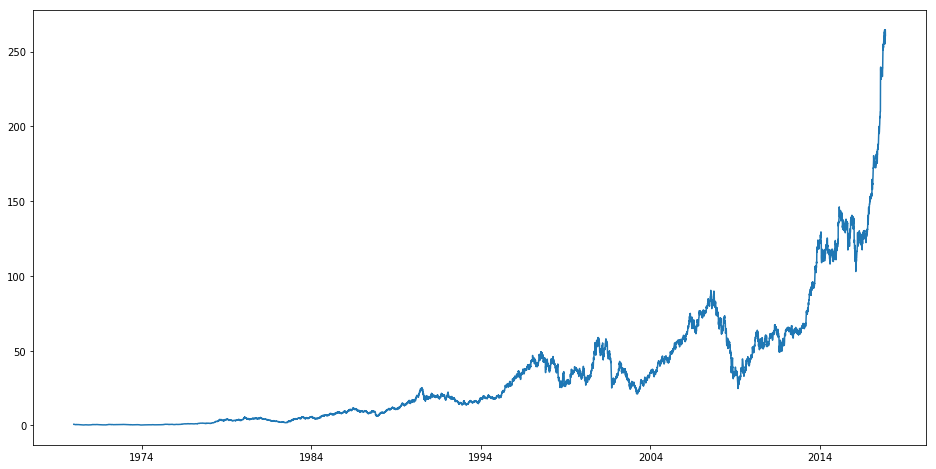

In [110]:
boeing_df['Date'] = pd.to_datetime(boeing_df.Date,format='%Y-%m-%d')
boeing_df.index = boeing_df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(boeing_df['Close'], label='Close Price history')

### 5-day MA model

Mean squared error: 1.94
Coefficient of determination: 1.00


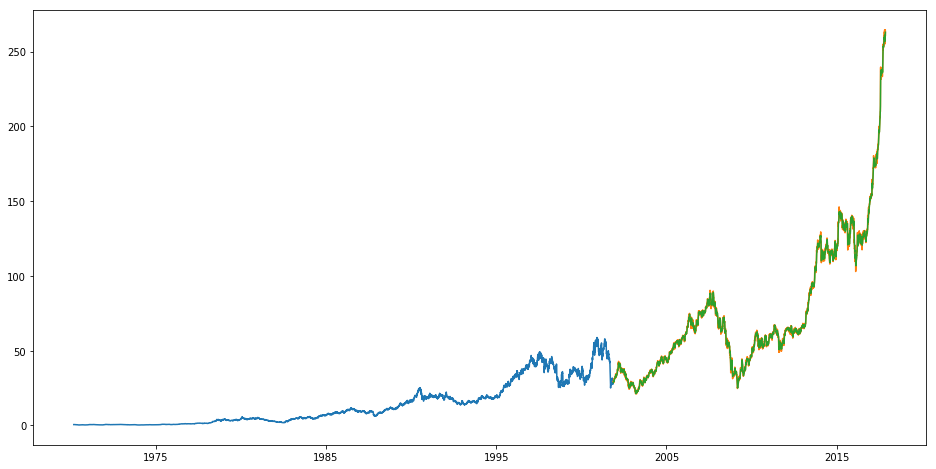

In [111]:
#creating dataframe with date and the target variable
model_df = boeing_df.copy()
model_df["ma-5"] = model_df['Close'].rolling(window=5).mean()
model_df["ma-50"] = model_df['Close'].rolling(window=50).mean()

model_df = model_df.dropna()

train = model_df.iloc[:8000].copy()
test = model_df.iloc[8000:].copy()

x_train = train[['ma-5']]
x_test = test[['ma-5']]
y_train = train[['Close']]
y_test = test[['Close']]

linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_pred = linReg.predict(x_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % linReg.score(x_test, y_test))

test['Predictions'] = 0
test['Predictions'] = y_pred

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Close Price history')
plt.plot(test[['Close', 'Predictions']])

<b> Observations</b>

It appears that the model was pretty good at predicting overall trend of the stock price. Its a perfect metric for prediction of the variance of the values based off of the perfect coefficient of determination and small MSE error. On the graph you see above, the orange line is the actual close price and the green line is the predicted close price. Both are very close. This makes sense since I'm only looking at the previous five days for a prediction so there isn't any lag to react to price trends.

### 50-day MA model

Mean squared error: 31.55
Coefficient of determination: 0.98


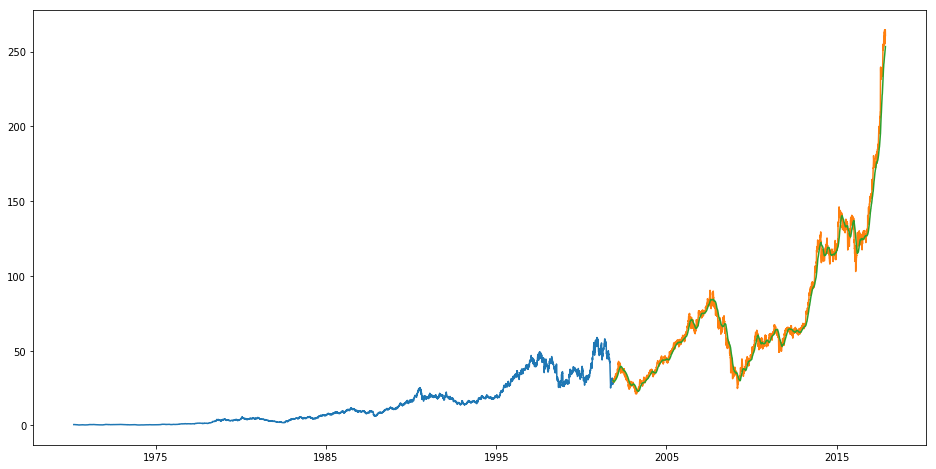

In [112]:
# train = model_df.iloc[:8000].copy()
# test = model_df.iloc[8000:].copy()
x_train = train[['ma-50']]
x_test = test[['ma-50']]
y_train = train[['Close']]
y_test = test[['Close']]

linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_pred = linReg.predict(x_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % linReg.score(x_test, y_test))

test['Predictions'] = 0
test['Predictions'] = y_pred

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Close Price history')
plt.plot(test[['Close', 'Predictions']])

<b> Observations</b>

Like the 5 day model, its pretty useful for predicting the stock price trend, though this time its not good at predicting the actual stock price. Its coefficient of determination is near perfect, but the MSE error is still large. The green line, once again the predicted close prices, is less correct than the 5-day model.

## Alibaba predictions

In [113]:
ali_df = pd.read_csv('baba.us.txt')
ali_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2014-09-19,92.70,99.70,89.95,93.89,271831625,0
1,2014-09-22,92.70,92.95,89.50,89.89,66628862,0
2,2014-09-23,89.00,90.48,86.62,87.17,38984872,0
3,2014-09-24,88.47,90.57,87.22,90.57,32016559,0
4,2014-09-25,91.09,91.50,88.50,88.92,28584828,0


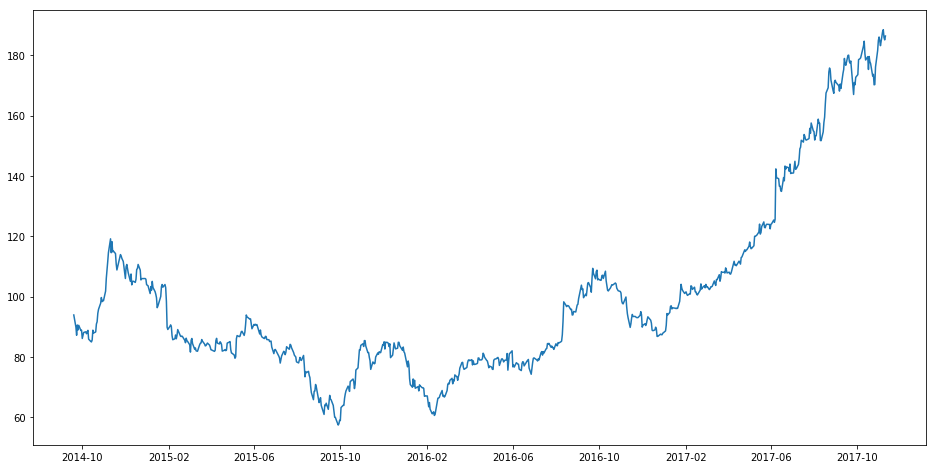

In [114]:
ali_df['Date'] = pd.to_datetime(ali_df.Date,format='%Y-%m-%d')
ali_df.index = ali_df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(ali_df['Close'], label='Close Price history')

### 5-day MA model

Mean squared error: 8.52
Coefficient of determination: 0.99


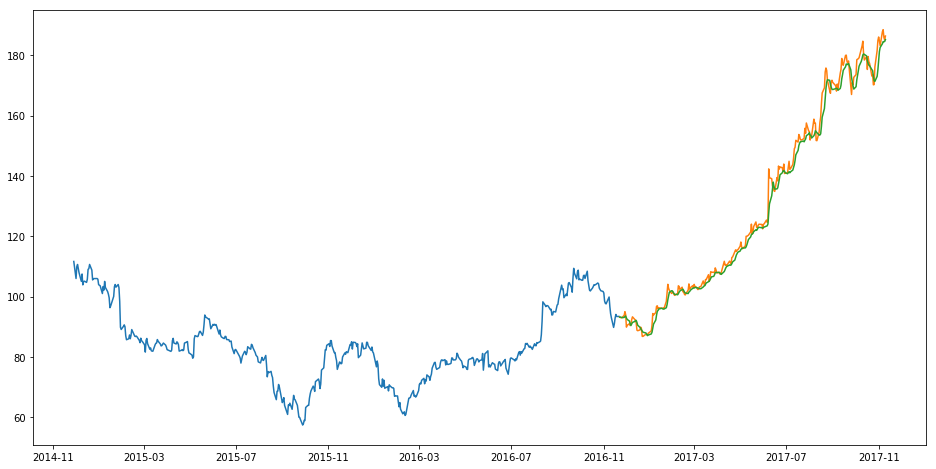

In [115]:
#creating dataframe with date and the target variable
model_df = ali_df.copy()
model_df["ma-5"] = model_df['Close'].rolling(window=5).mean()
model_df["ma-50"] = model_df['Close'].rolling(window=50).mean()

model_df = model_df.dropna()
# print(len(model_df.index)) # size is 745
model_df 

train = model_df.iloc[:500].copy()
test = model_df.iloc[500:].copy()

x_train = train[['ma-5']]
x_test = test[['ma-5']]
y_train = train[['Close']]
y_test = test[['Close']]

linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_pred = linReg.predict(x_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % linReg.score(y_test, y_pred))

test['Predictions'] = 0
test['Predictions'] = y_pred

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Close Price history')
plt.plot(test[['Close', 'Predictions']])

<b> Observations</b>

Since there is not much data for Alibaba's stock price compared to Boeing's, it makes sense that it wouldn't be a perfect indicator for close price, but its nearly there. The overall trend of the price is well predicted and the predicted prices are very close.

### 50-day MA model

Mean squared error: 327.72
Coefficient of determination: 0.68


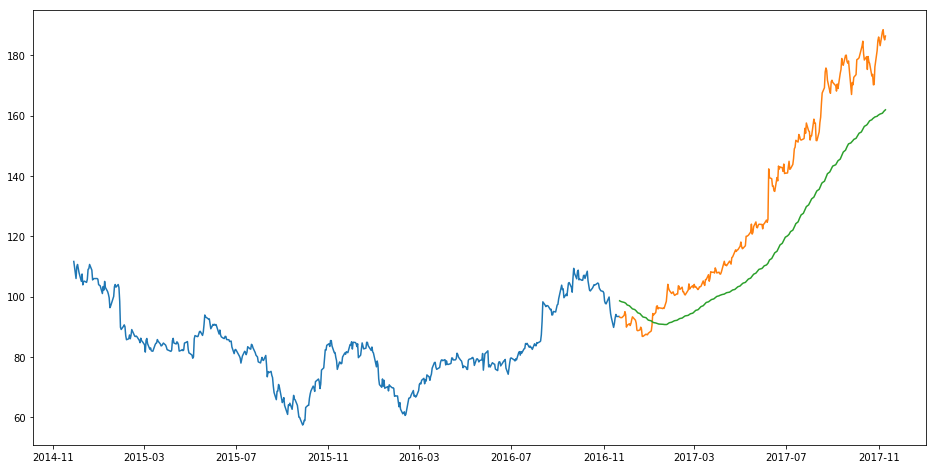

In [116]:
# train = model_df.iloc[:500].copy()
# test = model_df.iloc[500:].copy()
x_train = train[['ma-50']]
x_test = test[['ma-50']]
y_train = train[['Close']]
y_test = test[['Close']]

linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_pred = linReg.predict(x_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % linReg.score(x_test, y_test))

test['Predictions'] = 0
test['Predictions'] = y_pred

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Close Price history')
plt.plot(test[['Close', 'Predictions']])

<b> Observations</b>

This models performance is somewhat suprising and I think it has to do with a small training dataset being used compared to the Boeing MA models. Also since the past 50 days of a stocks price is taken into account, the first 50 entries are removed, so there is even less data to work with. The trend seems to be predicted, but the lag in response is apparent as the green line is a lot smoother than the previous models.

# Conclusions

Once again in phase 3, it was shown that sentiment analysis value of the top headlines of the r/news subreddit aren't great predictors of the stock market. Though as we saw, models trained using sentiment values had a prediction accuracy of over 50%, so it technically would be slightly better than random guessing. Furthermore, it appeared that models designed to predict the DJIA using moving averages faired slightly better than models using sentiment values. This may be due to the fact that moving averages are direct information from the stock market. When training models to predict individual stock prices using moving averages, it appears that the accuracy of models' predictions depends on a lot of data and thus a lot of time for the stock to mature before the accuracy is deemed reasonable. Its my belief this is why the 50-day average models performed worse than their 5-day counterparts.